### Import necessary packages

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### 1. Single EIS spectrum generated using the 1xZARC model

#### 1.1 Model parameters

In [44]:
R_inf = 10 # Ohmic resistance (Ohm)
R_ct_1 = 50 # charge-transfer resistance (Ohm)
phi_1 = 0.8 # dispersion parameter (unitless)
tau_1 = 0.1 # characteristic timescale (s)
R_ct_2 = 50 # charge-transfer resistance (Ohm)
phi_2 = 0.8 # dispersion parameter (unitless)
tau_2 = 0.0001 # characteristic timescale (s)

In [45]:
###

#### 1.2 Select the frequencies and timescales

In [46]:
# define the range of log-equispaced frequencies (Hz)
log_freq_min = -2.
log_freq_max = 6.

# define the range of log-equispaced timescales (s) defined as the inverse of the frequencies
log_tau_min = -6 
log_tau_max = 2  

# number of collocation points for the log frequencies and log timescales (10 points per decade)
N_freqs = 10*int(log_freq_max-log_freq_min)+1
N_taus = 10*int(log_tau_max-log_tau_min)+1

# define the frequencies ad timescales vectors
freq_vec = np.logspace(log_freq_min, log_freq_max, num = N_freqs, endpoint=True)
tau_vec = np.logspace(log_tau_min, log_tau_max, num = N_taus, endpoint=True)
log_tau_vec = np.log(tau_vec)

#### 1.3 Define the exact impedance

In [47]:
# the experimental impedance is obtained by ladening the exact impedance with white noise
rng = np.random.seed(12129)
sigma_n_exp = 0.5  

In [48]:
# exact impedance
Z_exact_1 = R_ct_1/(1.+(1j*2.*np.pi*freq_vec*tau_1)**phi_1)
Z_exact_2 = R_ct_2/(1.+(1j*2.*np.pi*freq_vec*tau_2)**phi_2)
Z_exact = R_inf + Z_exact_1 + Z_exact_2
Z_exp = Z_exact + sigma_n_exp*(np.random.normal(0, 1, N_freqs)+1j*np.random.normal(0, 1, N_freqs))

#### 1.4 Generate the data

In [49]:
# the experimental impedance is obtained by ladening the exact impedance with white noise
rng = np.random.seed(12129)
sigma_n_exp = 0.5  
Z_exp = Z_exact + sigma_n_exp*(np.random.normal(0, 1, N_freqs)+1j*np.random.normal(0, 1, N_freqs))

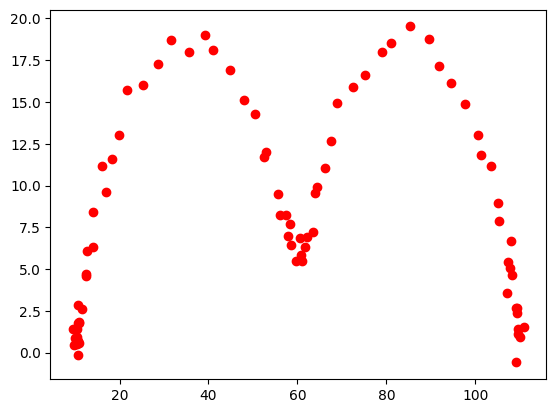

In [50]:
plt.plot(np.real(Z_exp),-np.imag(Z_exp), 'o', color = 'red')

#### 1.5 Save the data

In [51]:
# https://datagy.io/pandas-dataframe-to-csv/
# https://datagy.io/pandas-to-excel/

df = pd.DataFrame.from_dict({'Freq': freq_vec, 'Real': np.real(Z_exp), 'Imag': np.imag(Z_exp)})
df.to_csv('./data/2ZARCs/2XZARCequal.csv')

### 2. Multiple EIS data generated using the 2xZARC model

#### 2.1 Model parameters

In [52]:
R_inf = 10 # Ohmic resistance (Ohm)

R_ct_1_list = [5, 15, 25, 35, 45, 55]

phi_1 = 0.8 # dispersion parameter (unitless)
tau_1 = 0.1 # characteristic timescale (s)
R_ct_2 = 50 # charge-transfer resistance (Ohm)
phi_2 = 0.8 # dispersion parameter (unitless)
tau_2 = 0.0001 # characteristic timescale (s)

#### 2.2 Define the exact impedances and save the data

In [53]:
for n in range(len(R_ct_1_list)):
    Z_exact_1 = R_ct_1_list[n]/(1.+(1j*2.*np.pi*freq_vec*tau_1)**phi_1)
    Z_exact_2 = R_ct_2/(1.+(1j*2.*np.pi*freq_vec*tau_2)**phi_2)
    Z_exact = R_inf + Z_exact_1 + Z_exact_2
    Z_exp = Z_exact + sigma_n_exp*(np.random.normal(0, 1, N_freqs)+1j*np.random.normal(0, 1, N_freqs))
    df = pd.DataFrame.from_dict({'Freq': freq_vec, 'Real': np.real(Z_exp), 'Imag': np.imag(Z_exp)})
    df.to_csv('2ZARC'+str(n)+'.csv')
    
#     print(df)

In [42]:
# df